In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
churn = pd.read_csv("data/churn.csv")
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn['signup_date'] = pd.to_datetime(churn['signup_date'])
churn['churn'] = churn['last_trip_date'] > '2014-06-01'

In [8]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [45]:
for i in churn.phone.unique():
    print i, "# of records", churn[churn.phone == i]['churn'].count()
    print i, "Avg. churn", churn[churn.phone == i]['churn'].mean()

iPhone # of records 34582
iPhone Avg. churn 0.440633855763
Android # of records 15022
Android Avg. churn 0.195846092398
nan # of records 0
nan Avg. churn nan


In [46]:
for i in churn.city.unique():
    print i, "# of records", churn[churn.city == i]['churn'].count()
    print i, "Avg churn", churn[churn.city == i]['churn'].mean()

King's Landing # of records 10130
King's Landing Avg churn 0.622606120434
Astapor # of records 16534
Astapor Avg churn 0.24325632031
Winterfell # of records 23336
Winterfell Avg churn 0.342003770998


In [48]:
for i in churn.luxury_car_user.unique():
    print i, "# of records", churn[churn.luxury_car_user == i]['churn'].count()
    print i, "Avg churn", churn[churn.luxury_car_user == i]['churn'].mean()

True # of records 18854
True Avg churn 0.496393338284
False # of records 31146
False Avg churn 0.287388428691


In [25]:
for i in sorted(churn.city.unique()):
        print i, churn[churn.city==i]['city'].count()

 Astapor 16534
King's Landing 10130
Winterfell 23336


In [16]:
for auc in sorted(churn.phone.unique()):
    print auc, churn[churn.phone==auc]['phone'].count()

 nan 0
Android 15022
iPhone 34582


In [9]:
churn.phone.unique()

array(['iPhone', 'Android', nan], dtype=object)

In [7]:
churn.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'churn'],
      dtype='object')

In [38]:
churn['phone'] = churn['phone'].map({1: 'iPhone', 0: 'Android'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103fffcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11936b490>]], dtype=object)

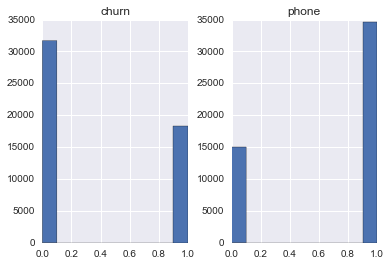

In [52]:
cols = churn.columns.tolist()
cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct',
 'churn']

In [53]:
churn = pd.concat([churn, pd.get_dummies(churn.phone, prefix='phone', drop_first=True)], axis=1)
churn = pd.concat([churn, pd.get_dummies(churn.city, prefix='city', drop_first=True)], axis=1)
churn = pd.concat([churn, pd.get_dummies(churn.luxury_car_user, prefix='luxury', drop_first=True)], axis=1)
churn.drop(['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct'], inplace=True, axis=1)
churn.columns

Index([u'churn', u'phone_iPhone', u'city_King's Landing', u'city_Winterfell',
       u'luxury_True'],
      dtype='object')

In [54]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [55]:
y = churn.pop('churn').values

In [56]:
X = churn.values
X_const = add_constant(X, prepend=True)

In [65]:
logit_model = Logit(y, X_const).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.570436
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49995
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 May 2016   Pseudo R-squ.:                  0.1316
Time:                        10:21:36   Log-Likelihood:                -28522.
converged:                       True   LL-Null:                       -32845.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4048      0.029    -82.027      0.000      -2.462      -2.347
x1             1.1468      0.024     47.324      0.000       1.099       1.194
x2             1.7118      0.029     59.110      0.000       1.655       1.769
x3             0.5668      0.024     23.683      0.000       0.520       0.614
x4             0.9273      0.021     44.769      0.000       0.887       0.968
==============================================================================
"""

In [69]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

kfold = KFold(len(y))

accuracies = []
precisions = []
recalls = []

for train_index, test_index in kfold:
    model = LogisticRegression()
    model.fit(X_const[train_index], y[train_index])
    y_predict = model.predict(X_const[test_index])
    y_true = y[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print "accuracy:", np.average(accuracies)
print "precision:", np.average(precisions)
print "recall:", np.average(recalls)

accuracy: 0.705180073766
precision: 0.624171185619
recall: 0.489959897517
